In [1]:
library(Seurat)
library(tidyverse)
library(Matrix)
library(scales)
library(cowplot)
library(RCurl)

NameError: name 'library' is not defined

##Step 1. read in samples

In [128]:
# merge samples and QC
merged <- merge(list_of_seurat[[1]],list_of_seurat[-1])

Warning message in CheckDuplicateCellNames(object.list = objects):
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."


In [44]:
##!! R1_ and R2_ not included
# each sample has three files
## barcodes.tsv:
    ## contains the cell barcodes, as the column names
## features.tsv:
    ## contains the gene ids, as the row names
## matrix.mtx
    ## the counts, with barcodes as column names, gene id as row names
# read samples from each associated subfolder
path_to_samples <- "SV_cellranger_outs" # change this!
list_of_samples <- list.dirs(path_to_samples, recursive = FALSE)
list_of_samples_names <- list.dirs(path_to_samples, recursive = FALSE, full.names = FALSE)
list_of_seurat <- list()
for(i in 1:length(list_of_samples)){
  
    # read UMI table
    print(list_of_samples[i])
    data_seu <- Read10X(list_of_samples[i]) 
  
    # make Seurat object
    if (i<=18) {
        list_of_seurat[[i]] <- CreateSeuratObject(data_seu$`Gene Expression`, project = list_of_samples_names[[i]])
        list_of_seurat[[i]][["CMO"]] <- CreateAssayObject(counts = data_seu$`Multiplexing Capture`)
    }
    #looks like Run1 and Run2 not CMO
    else {
        list_of_seurat[[i]] <- CreateSeuratObject(data_seu, project = list_of_samples_names[[i]])
        list_of_seurat[[i]][["CMO"]] <- CreateAssayObject(counts=data_seu)
    }
    
}

[1] "SV_cellranger_outs/Age3_SV_20C1"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Age3_SV_20C2"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Age3_SV_20R1"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Age3_SV_20R2"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Age3_SV_28C1"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Age3_SV_28C2"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Age3_SV_28R1"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Age3_SV_28R2"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Age3_SV_Y1"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Age3_SV_Y2"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Food2_SV_CR1"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Food2_SV_CR2"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Food2_SV_Ctrl1"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Food2_SV_Ctrl2"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Food2_SV_HF1"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Food2_SV_HF2"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Food2_SV_LP1"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Food2_SV_LP2"


10X data contains more than one type and is being returned as a list containing matrices of each type.



[1] "SV_cellranger_outs/Run1_SV_Old"
[1] "SV_cellranger_outs/Run1_SV_Y"
[1] "SV_cellranger_outs/Run2_SV_C"
[1] "SV_cellranger_outs/Run2_SV_HF"
[1] "SV_cellranger_outs/Run2_SV_LP"


In [129]:
head(merged)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_CMO,nFeature_CMO
,<chr>,<dbl>,<int>,<dbl>,<int>
AAACCCACAAGTGATA-1_1,Age3_SV_20C1,3944,1632,5291,10
AAACGAAGTAGGATAT-1_1,Age3_SV_20C1,1608,739,532,10
AAACGCTCAACCGCCA-1_1,Age3_SV_20C1,3623,1622,834,10
AAAGGTAGTTGCCGAC-1_1,Age3_SV_20C1,2486,928,476,10
AAAGTCCCACTGTGAT-1_1,Age3_SV_20C1,68702,4006,2611,10
AAATGGAAGTATCTGC-1_1,Age3_SV_20C1,5679,1467,1885,10
AACAAGATCCCTCAAC-1_1,Age3_SV_20C1,878,470,4398,10
AACAGGGTCCTTCTTC-1_1,Age3_SV_20C1,2323,840,578,10
AACCAACCATATACCG-1_1,Age3_SV_20C1,16406,3581,3733,10


In [130]:
merged$log10GenesPerUMI <- log10(merged$nFeature_RNA) / log10(merged$nCount_RNA)
merged$mitoRatio <- PercentageFeatureSet(object = merged, pattern = "^mt-")
merged$mitoRatio <- merged@meta.data$mitoRatio / 100
metadata <- merged@meta.data
metadata$cells <- rownames(metadata)
metadata <- metadata %>% 
            dplyr::rename(seq_folder = orig.ident,
                          nUMI = nCount_RNA,
                          nGene = nFeature_RNA,
                          sample = orig.ident)

In [131]:
head(metadata)

,sample,nUMI,nGene,nCount_CMO,nFeature_CMO,log10GenesPerUMI,mitoRatio,cells
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>
AAACCCACAAGTGATA-1_1,Age3_SV_20C1,3944,1632,5291,10,0.8934306,0.037525355,AAACCCACAAGTGATA-1_1
AAACGAAGTAGGATAT-1_1,Age3_SV_20C1,1608,739,532,10,0.8946939,0.020522388,AAACGAAGTAGGATAT-1_1
AAACGCTCAACCGCCA-1_1,Age3_SV_20C1,3623,1622,834,10,0.9019357,0.017112890,AAACGCTCAACCGCCA-1_1
AAAGGTAGTTGCCGAC-1_1,Age3_SV_20C1,2486,928,476,10,0.8739647,0.026950925,AAAGGTAGTTGCCGAC-1_1
AAAGTCCCACTGTGAT-1_1,Age3_SV_20C1,68702,4006,2611,10,0.7448281,0.007656255,AAAGTCCCACTGTGAT-1_1
AAATGGAAGTATCTGC-1_1,Age3_SV_20C1,5679,1467,1885,10,0.8434206,0.015143511,AAATGGAAGTATCTGC-1_1


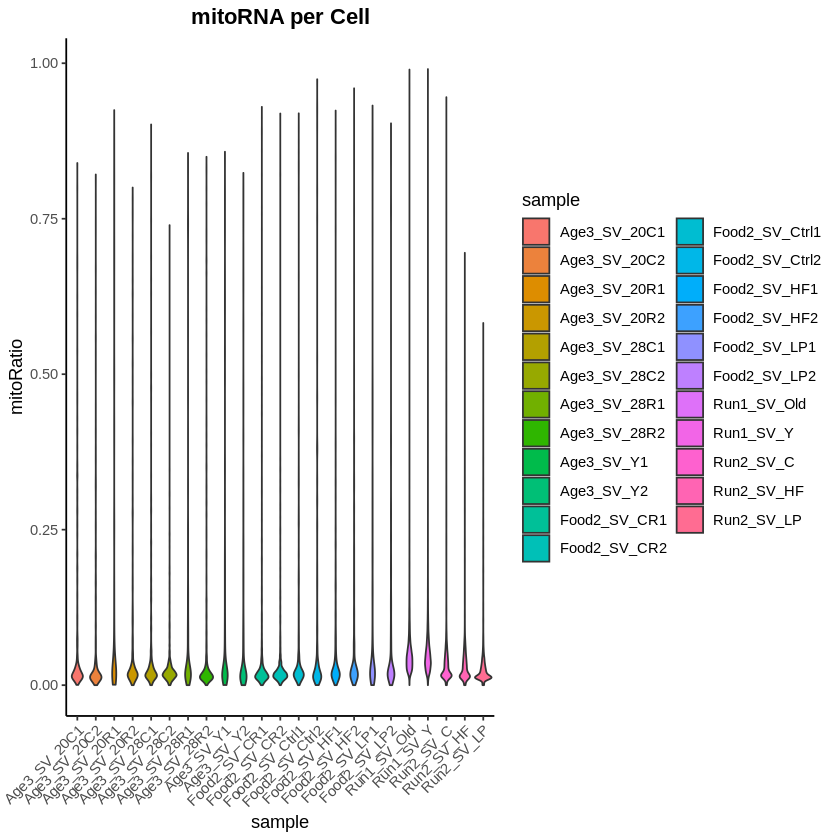

In [135]:
# mito ratio
metadata %>% 
  ggplot(aes(x=sample, y=mitoRatio, fill=sample)) + 
  geom_violin() + 
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  theme(plot.title = element_text(hjust=0.5, face="bold")) +
  ggtitle("mitoRNA per Cell")

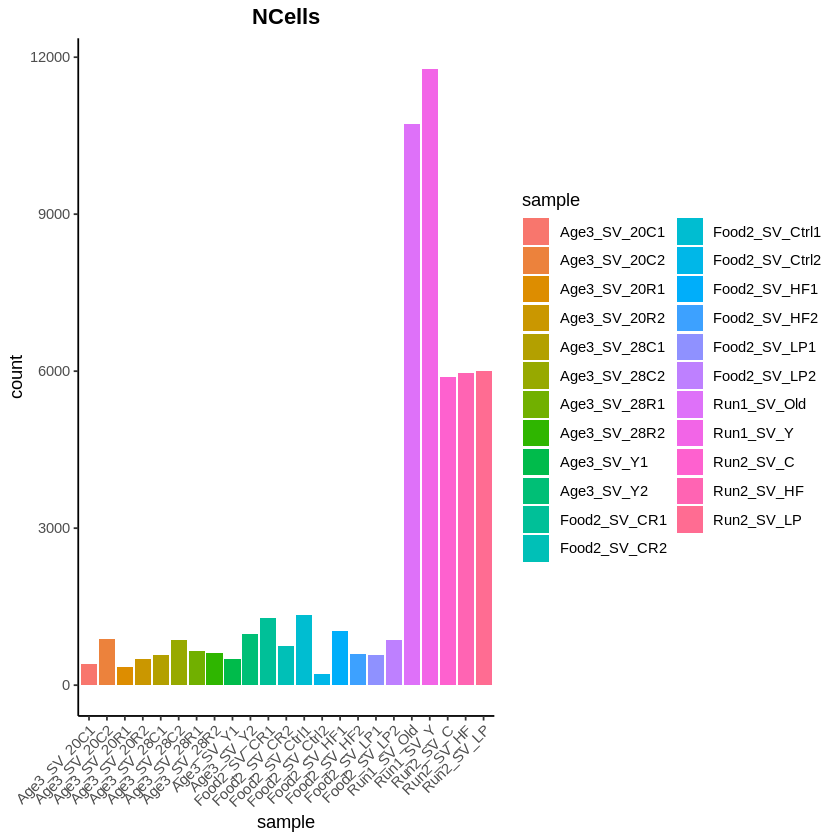

In [67]:
# cell counts
metadata %>% 
    ggplot(aes(x=sample, fill=sample)) + 
    geom_bar() +
    theme_classic() +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
    theme(plot.title = element_text(hjust=0.5, face="bold")) +
    ggtitle("NCells")

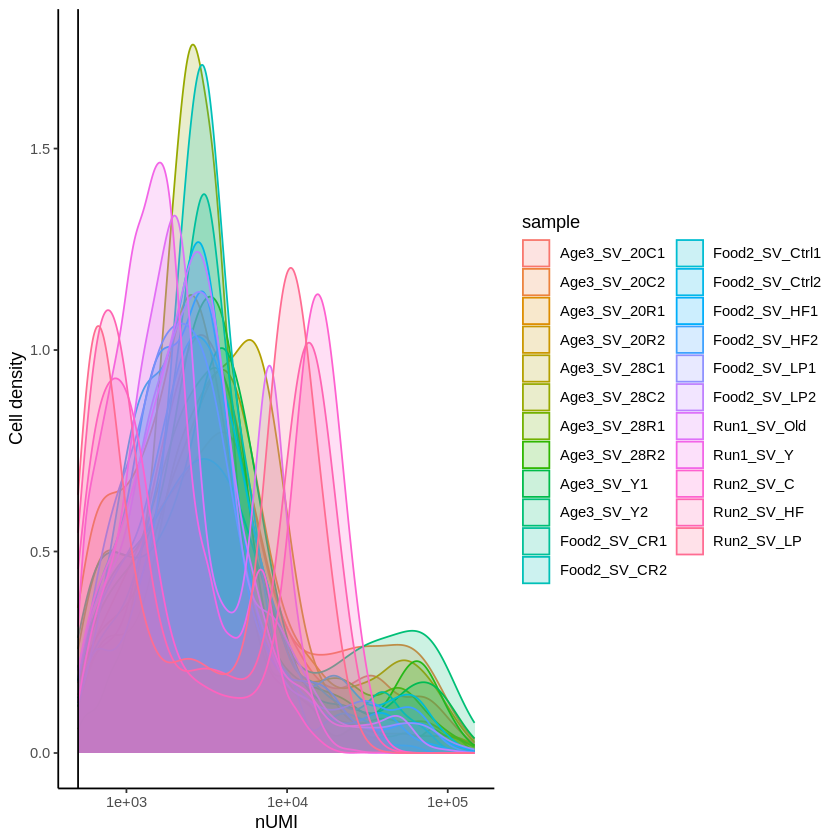

In [68]:
# UMI count per cell
# pretty high UMI for most samples, but very different, could be a problem at later clustering
metadata %>% 
    ggplot(aes(color=sample, x=nUMI, fill= sample)) + 
    geom_density(alpha = 0.2) + 
    scale_x_log10() + 
    theme_classic() +
    ylab("Cell density") +
    geom_vline(xintercept = 500)

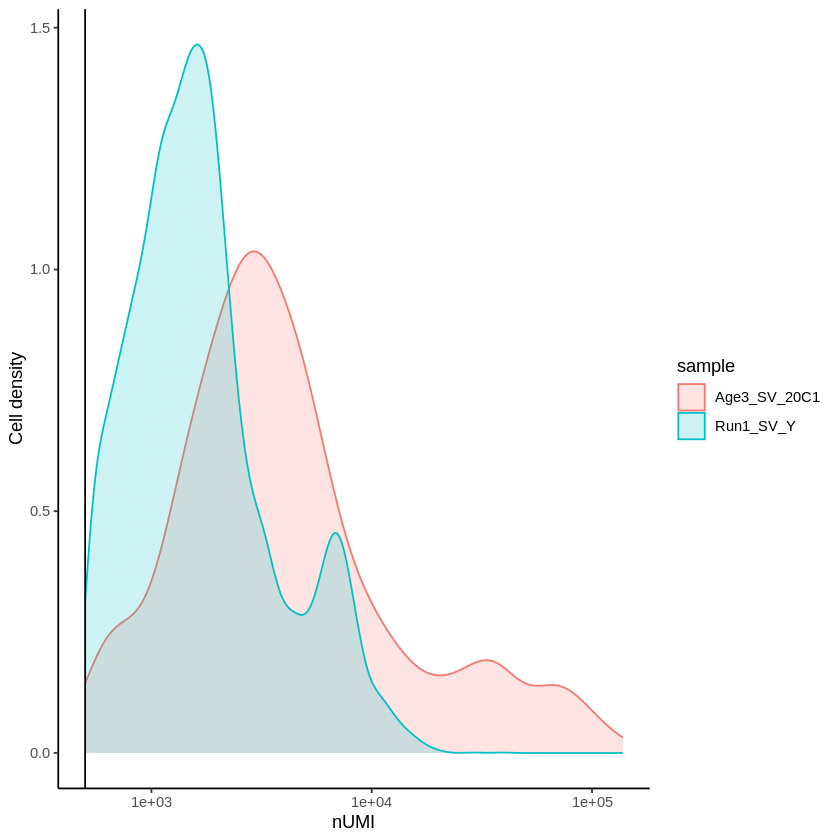

In [77]:
metadata[metadata$sample=='Age3_SV_20C1' | metadata$sample=='Run1_SV_Y',] %>%
    ggplot(aes(color=sample, x=nUMI, fill= sample)) + 
    geom_density(alpha = 0.2) + 
    scale_x_log10() + 
    theme_classic() +
    ylab("Cell density") +
    geom_vline(xintercept = 500)

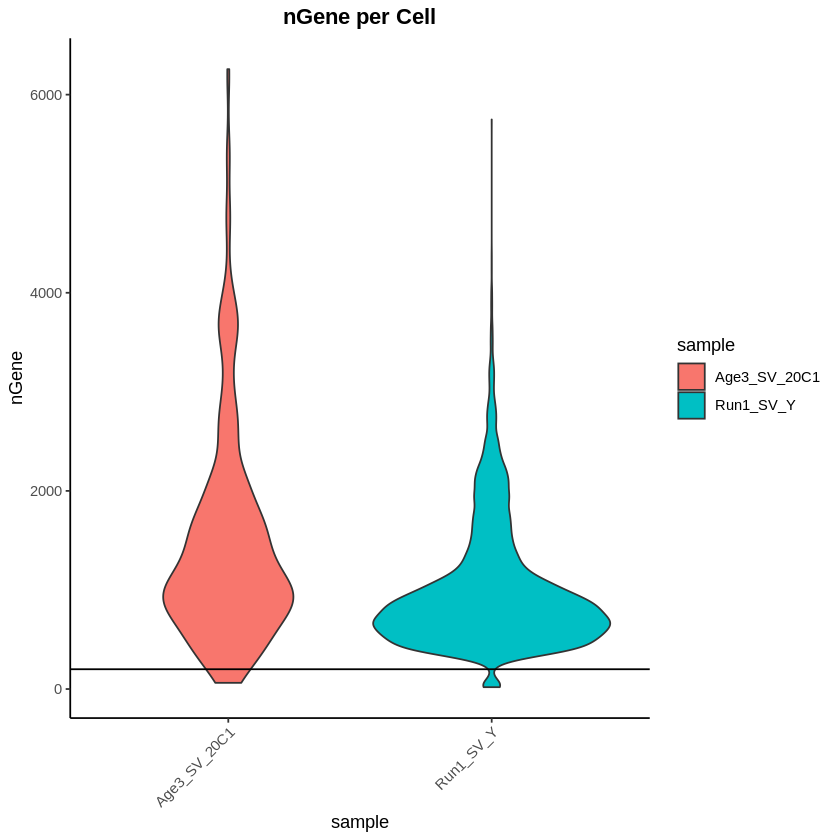

In [93]:
# counting number of genes per cell
metadata[metadata$sample=='Age3_SV_20C1' | metadata$sample=='Run1_SV_Y',] %>% 
  ggplot(aes(x=sample, y=nGene, fill=sample)) + 
  geom_violin() + 
  theme_classic() +
  geom_hline(yintercept = 200) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  theme(plot.title = element_text(hjust=0.5, face="bold")) +
  ggtitle("nGene per Cell")

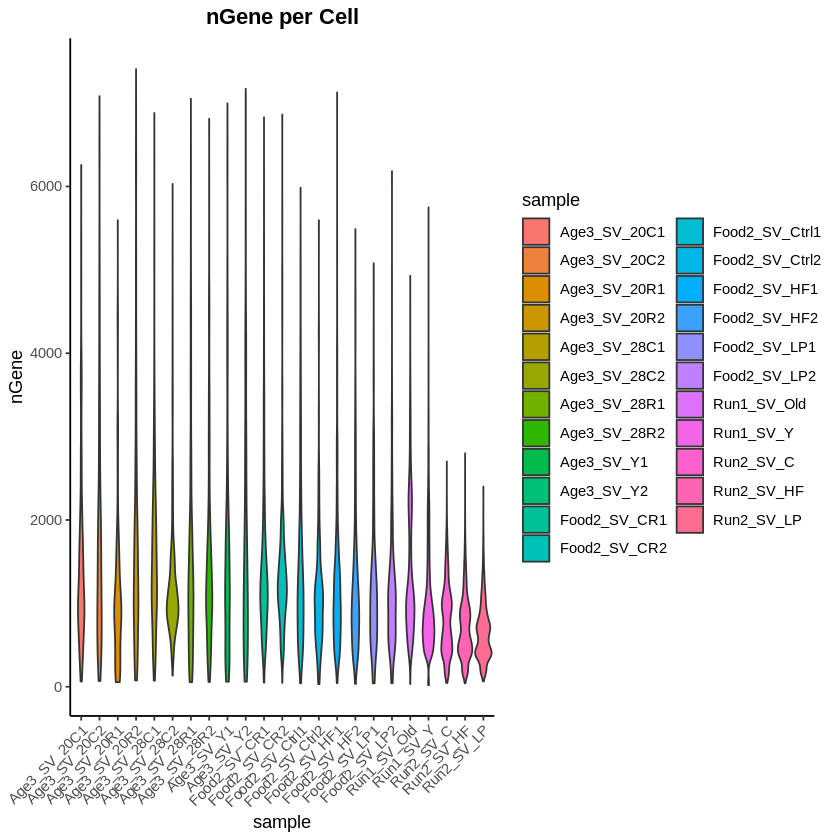

In [132]:
metadata %>% 
  ggplot(aes(x=sample, y=nGene, fill=sample)) + 
  geom_violin() + 
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  theme(plot.title = element_text(hjust=0.5, face="bold")) +
  ggtitle("nGene per Cell")

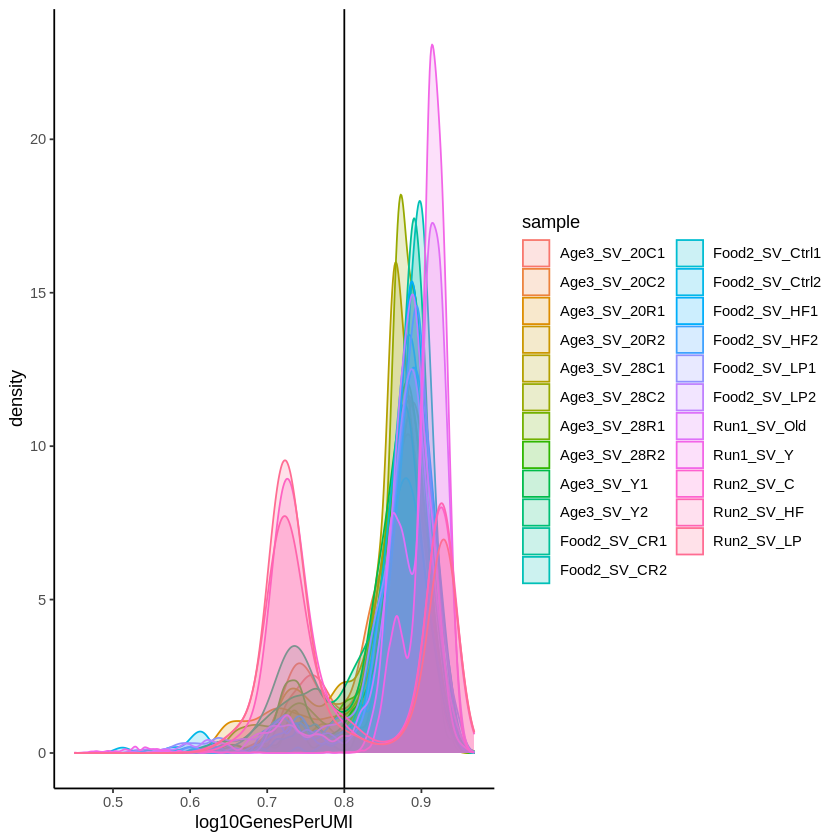

In [88]:
# if the sequencing per cell is not saturated, we can have many genes, but lower counts per genes
# some cell types also have low complexity, very few expressed genes --> red blood cells
# 0.8 is genearally good
metadata %>%
  ggplot(aes(x=log10GenesPerUMI, color = sample, fill=sample)) +
  geom_density(alpha = 0.2) +
  theme_classic() +
  geom_vline(xintercept = 0.8)

In [140]:
subset <- subset(x=merged, subset=(nCount_RNA>=500) & (nFeature_RNA >= 200)& (mitoRatio < 0.1))

In [145]:
subset2 <- subset(x=merged, subset=(nCount_RNA>=500) & (nFeature_RNA >= 200)& (mitoRatio < 0.1) & (log10GenesPerUMI>0.8) )

In [ ]:
 # & (log10GenesPerUMI>0.8) 

In [146]:
# remove genes that has zero expression in all cells
counts <- GetAssayData(subset2, slot='counts')
nonzero <- counts > 0
keep_genes <- Matrix::rowSums(nonzero) >= 10
filtered_counts <- counts[keep_genes,]
subset2 <- CreateSeuratObject(filtered_counts,meta.data=subset@meta.data)

Warning message in CreateSeuratObject.default(filtered_counts, meta.data = subset@meta.data):
"Some cells in meta.data not present in provided counts matrix"


In [142]:
subset

An object of class Seurat 
19601 features across 47804 samples within 1 assay 
Active assay: RNA (19601 features, 0 variable features)

In [147]:
subset2

An object of class Seurat 
19263 features across 37252 samples within 1 assay 
Active assay: RNA (19263 features, 0 variable features)

In [148]:
saveRDS(subset2, file="SeuratOut/seurat_filtered_highComplexity.rds")

In [104]:
# normalize and variance stablize/regress out noise for each sample
# identify if any other sources of variation first

# simple normalization on seq depth
simple_normed <- NormalizeData(subset)

In [115]:
# complie cell cycle markers
library(AnnotationHub)
library(ensembldb)
cc_file <- getURL("https://raw.githubusercontent.com/hbc/tinyatlas/master/cell_cycle/Mus_musculus.csv") 
cell_cycle_genes <- read.csv(text = cc_file)

In [116]:
# Connect to AnnotationHub
ah <- AnnotationHub()

# Access the Ensembl database for organism
ahDb <- query(ah, 
              pattern = c("Homo sapiens", "EnsDb"), 
              ignore.case = TRUE)

# Acquire the latest annotation files
id <- ahDb %>%
        mcols() %>%
        rownames() %>%
        tail(n = 1)

# Download the appropriate Ensembldb database
edb <- ah[[id]]

# Extract gene-level information from database
annotations <- genes(edb, 
                     return.type = "data.frame")

# Select annotations of interest
annotations <- annotations %>%
        dplyr::select(gene_id, gene_name, seq_name, gene_biotype, description)

# Get gene names for Ensembl IDs for each gene
cell_cycle_markers <- dplyr::left_join(cell_cycle_genes, annotations, by = c("geneID" = "gene_id"))

# Acquire the S phase genes
s_genes <- cell_cycle_markers %>%
        dplyr::filter(phase == "S") %>%
        pull("gene_name")
        
# Acquire the G2M phase genes        
g2m_genes <- cell_cycle_markers %>%
        dplyr::filter(phase == "G2/M") %>%
        pull("gene_name")

snapshotDate(): 2022-10-31

loading from cache



In [120]:
# no cell cycle genes detected, so no regression on cell cycle
# simple_normed <- CellCycleScoring(simple_normed,g2m.features=g2m_genes,s.features=s_genes)